<a href="https://colab.research.google.com/github/Venkatarameshredd/30DaysOfWebDevelopment/blob/main/k_means_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

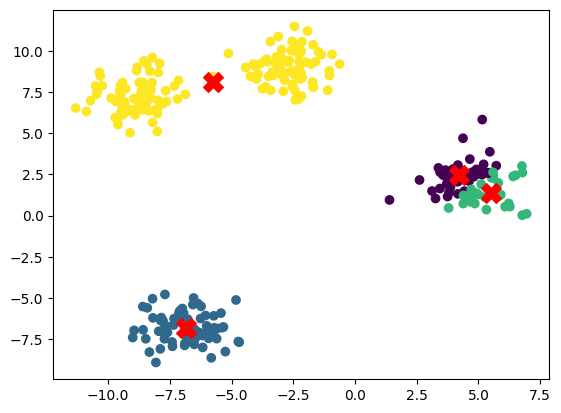

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x,y=make_blobs(n_samples=300,centers=4,random_state=42)

def initialize_centroids(x,k):
  np.random.seed(42)
  random_indices=np.random.choice(len(x),size=k,replace=False)
  return x[random_indices]

def assign_points_to_centroids(x,centroids):
  distances=np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)
  return np.argmin(distances,axis=1)

def update_centroids(x,labels,k):
  new_centroids=np.array([x[labels==i].mean(axis=0) for i in range(k)])
  return new_centroids

#implement the main kmeans Function
def kmeans(x,k,max_iters=100):
  centroids=initialize_centroids(x,k)
  for _ in range(max_iters):
    labels=assign_points_to_centroids(x,centroids)

    new_centroids=update_centroids(x,labels,k)
    if np.all(centroids==new_centroids):
      break
    centroids = new_centroids
  return centroids,labels

#visualise the result
centroids,labels=kmeans(x,k=4)

#plot the dataset
plt.scatter(x[:,0],x[:,1],c=labels,cmap="viridis")

#plot the centroids
plt.scatter(centroids[:,0],centroids[:,1],c="red",s=200,marker='X')
plt.show()

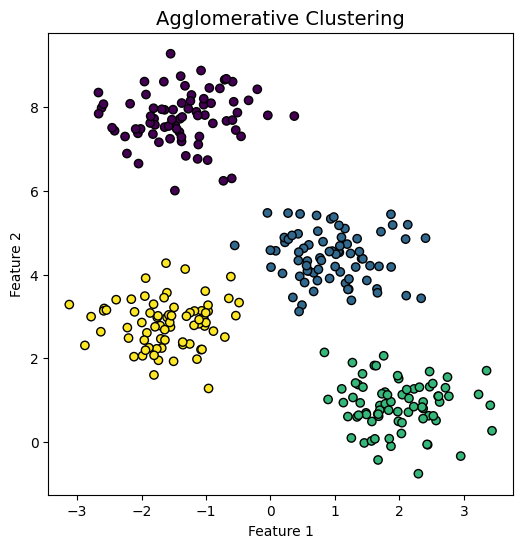

In [ ]:
#importing
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#giving data sets
data, _ =make_blobs(n_samples=300, centers=4, cluster_std=0.60,random_state=0)

#clustering
agg_cluster =AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="ward")
clusters=agg_cluster.fit_predict(data)


plt.figure(figsize=(6,6))
plt.scatter(data[:, 0],data[:, 1],c=clusters, cmap="viridis",edgecolor='k')
plt.title("Agglomerative Clustering",fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()